In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
os.nice(19)

19

In [2]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
from astropy import constants as c
%matplotlib inline

#styling
import seaborn as sns
sns.set_style(style='ticks', rc=None)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

matplotlib.rcParams.update({'font.size': 20})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'
fontsize=20

In [5]:
df_all = pd.read_csv('PS_2022.10.27_23.24.19.csv', skiprows=96, delimiter=',',na_values=[''])
df_all = df_all[df_all['default_flag']==1]
df_all.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
4,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
5,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
12,14 Her b,14 Her,1,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2022-09-19,2022-09,2022-09-19
15,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,Multiple Observatories,Published Confirmed,0,...,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,2018-09-04,2017-03,2018-09-06


In [6]:
df_all.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [7]:
len(df_all)

5190

In [8]:
df_M=df_all[df_all['st_teff']<4000]
len(df_M)

393

In [9]:
df_targets = []
name_targets = []

df_tmp = df_all[df_all['hostname']=='TOI-1696']
df_targets.append(df_tmp)
name_targets.append(list(df_tmp['pl_name'])[0])

In [10]:
df_tmp = df_all[df_all['hostname']=='K2-25']
df_targets.append(df_tmp)
name_targets.append(list(df_tmp['pl_name'])[0])

df_tmp = df_all[df_all['pl_name']=='LHS 1140 b']
df_targets.append(df_tmp)
name_targets.append(list(df_tmp['pl_name'])[0])

df_tmp = df_all[df_all['pl_name']=='TRAPPIST-1 h']
df_targets.append(df_tmp)
name_targets.append(list(df_tmp['pl_name'])[0])

In [11]:
name_targets

['TOI-1696 b', 'K2-25 b', 'LHS 1140 b', 'TRAPPIST-1 h']

Text(0, 0.5, 'Planetary Radius ($R_\\oplus$)')

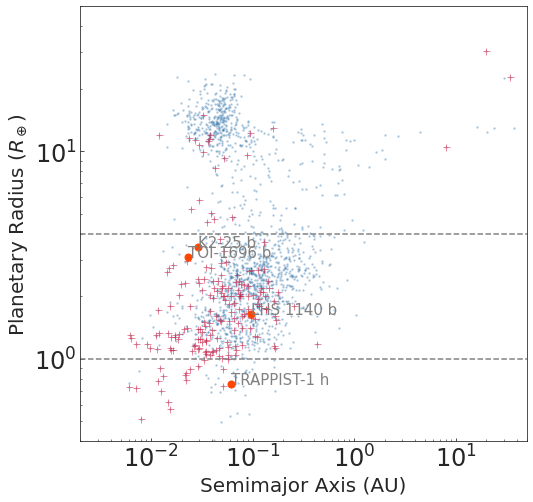

In [12]:
f,ax = pl.subplots(1,1,figsize=(8,8))
ax.loglog()

pl.plot(df_all['pl_orbsmax'], df_all['pl_rade'],'.', ms=3,alpha=0.3, color='steelblue')
pl.plot(df_M['pl_orbsmax'], df_M['pl_rade'],'+', ms=7, alpha=0.5, color='crimson')

for n in range(len(name_targets)):
    df = df_targets[n]
    #c = matplotlib.patches.Circle((df['pl_orbsmax'],df['pl_rade']), radius=0.2)
    #ax.add_patch(c)
    
    pl.plot(df['pl_orbsmax'], df['pl_rade'],'o', ms=7, alpha=1, color='orangered')
    ax.text(df['pl_orbsmax'], df['pl_rade'],name_targets[n], color='gray', fontsize=15)
    
ax.hlines(4.0, 2.0e-3, 50, linestyles='dashed', color='gray')
ax.hlines(1.0, 2.0e-3, 50, linestyles='dashed', color='gray')


pl.xlim(2.0e-3, 50)
pl.ylim(0.4, 50)

pl.xlabel(r'Semimajor Axis (AU)')
pl.ylabel(r'Planetary Radius ($R_\oplus$)')

#f.savefig('../TLSE/K2-25/output/scatter_plot.pdf', bbox_inches='tight')

In [13]:
10**1.224

16.749428760264372

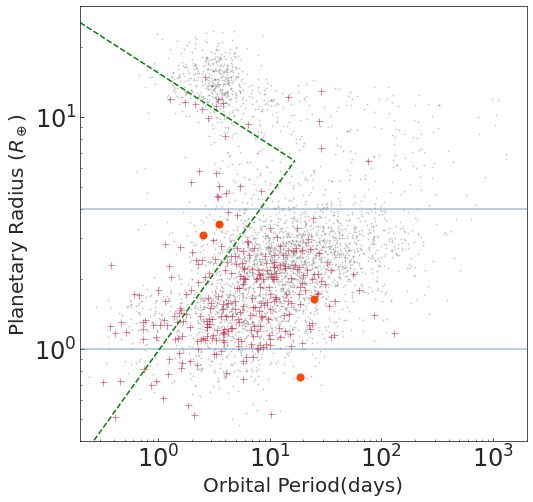

In [15]:
f,ax = pl.subplots(1,1,figsize=(8,8))
ax.loglog()

pl.plot(df_all['pl_orbper'], df_all['pl_rade'],'.', ms=2,alpha=0.3, color='gray', zorder=0)
pl.plot(df_M['pl_orbper'], df_M['pl_rade'],'+', ms=7, alpha=0.5, color='crimson')

for n in range(len(name_targets)):
    df = df_targets[n]
    #c = matplotlib.patches.Circle((df['pl_orbsmax'],df['pl_rade']), radius=0.2)
    #ax.add_patch(c)
    
    pl.plot(df['pl_orbper'], df['pl_rade'],'o', ms=7, alpha=1, color='orangered')
    #ax.text(df['pl_orbper'], df['pl_rade'],name_targets[n], color='gray', fontsize=15)
    
ax.hlines(1, 0.2, 2000, color='steelblue', alpha=0.5)
ax.hlines(4, 0.2, 2000, color='steelblue', alpha=0.5)

P = np.linspace(0.2, 16.8, 1000)
R1 = 10**(-0.31*np.log10(P) +1.19)
R2 = 10**(0.67*np.log10(P)-0.01)

pl.plot(P, R1, '--', color='green')
pl.plot(P, R2, '--', color='green')

#R=(0.254)P−(0.003±0.025),

pl.xlim(0.2, 2000)
pl.ylim(0.4, 30)

pl.xlabel(r'Orbital Period(days)')
pl.ylabel(r'Planetary Radius ($R_\oplus$)')

f.savefig('../TLSE/K2-25/output/scatter_plot.pdf', bbox_inches='tight')

In [16]:
df_all.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [18]:
df_all_s = df_all[df_all['pl_bmasseerr1'].notna()]
df_all_s = df_all_s[df_all_s['pl_bmasseerr2'].notna()]
df_all_s = df_all_s[df_all_s['pl_bmasseerr1'] < 0.25 * df_all_s['pl_bmasse']]
df_all_s = df_all_s[np.abs(df_all_s['pl_bmasseerr2']) < 0.25 * df_all_s['pl_bmasse']]


df_all_s = df_all_s[df_all_s['pl_radeerr1'].notna()]
df_all_s = df_all_s[df_all_s['pl_radeerr2'].notna()]
df_all_s = df_all_s[df_all_s['pl_radeerr1'] < 0.08 * df_all_s['pl_rade']]
df_all_s = df_all_s[np.abs(df_all_s['pl_radeerr2']) < 0.08 * df_all_s['pl_rade']]

df_all_s.reset_index(drop=True)

len(df_all_s)

560

In [19]:
df_M_s=df_all_s[df_all_s['st_teff']<4000]
len(df_M_s)

57

In [20]:
df_targets_s = []
name_targets_s = []

#df_tmp = df_all[df_all['hostname']=='TOI-1696']
#df_targets.append(df_tmp)
#name_targets.append(list(df_tmp['pl_name'])[0])

In [21]:
df_tmp = df_all_s[df_all_s['hostname']=='K2-25']
df_targets_s.append(df_tmp)
name_targets_s.append(list(df_tmp['pl_name'])[0])

df_tmp = df_all_s[df_all_s['pl_name']=='LHS 1140 b']
df_targets_s.append(df_tmp)
name_targets_s.append(list(df_tmp['pl_name'])[0])

df_tmp = df_all_s[df_all_s['pl_name']=='TRAPPIST-1 h']
df_targets_s.append(df_tmp)
name_targets_s.append(list(df_tmp['pl_name'])[0])

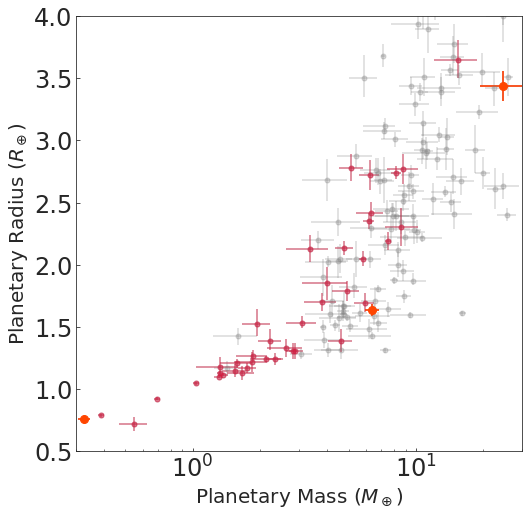

In [22]:
f,ax = pl.subplots(1,1,figsize=(8,8))
pl.xlim(0.3, 30)


pl.errorbar(df_all_s['pl_bmasse'], df_all_s['pl_rade'],xerr=[np.abs(df_all_s['pl_bmasseerr2']),df_all_s['pl_bmasseerr1']],\
            yerr=[np.abs(df_all_s['pl_radeerr2']),df_all_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.3, color='gray')
pl.errorbar(df_M_s['pl_bmasse'], df_M_s['pl_rade'],xerr=[np.abs(df_M_s['pl_bmasseerr2']),df_M_s['pl_bmasseerr1']],\
            yerr=[np.abs(df_M_s['pl_radeerr2']),df_M_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.5, color='crimson')
#pl.plot(df_M['pl_bmasse'], df_M['pl_rade'],'+', ms=7, alpha=0.5, color='crimson')

for n in range(len(name_targets_s)):
    df = df_targets_s[n]

    pl.errorbar(df['pl_bmasse'], df['pl_rade'],xerr=[np.abs(df['pl_bmasseerr2']),df['pl_bmasseerr1']],\
                yerr=[np.abs(df['pl_radeerr2']),df['pl_radeerr1']],fmt='o', ms=8, alpha=1, color='orangered')
    #pl.plot(df['pl_bmasse'], df['pl_rade'],'o', ms=7, alpha=1, color='orangered')
    #ax.text(df['pl_bmasse'], df['pl_rade'],name_targets[n], color='gray', fontsize=15)

pl.ylim(0.5, 4)

pl.xlabel(r'Planetary Mass ($M_\oplus$)')
pl.ylabel(r'Planetary Radius ($R_\oplus$)')
pl.xscale('log')

理論モデル
https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrtables　　

元論文
https://www.pnas.org/doi/10.1073/pnas.1812905116#supplementary-materials

In [23]:
files=['data/Earthlike01h500K1mbar.txt',
 'data/Earthlike03h500K1mbar.txt',
          'data/Earthlike1h500K1mbar.txt',
 'data/Earthlike2h500K1mbar.txt']
 #'data/Earthlike5h500K1mbar.txt']

df_h2 = []
for file in files:
    df_h2.append(pd.read_csv(file, sep='\t', header=None))
labels_h2=[0.1, 0.3, 1, 2]
lss = ['solid', 'dashdot', 'dashed', 'dotted']

In [24]:
glob('data/massradius*.txt')

['data/massradiusEarthlikeRocky.txt',
 'data/massradiusFe.txt',
 'data/massradius_100percentH2O_500K_1mbar.txt',
 'data/massradius_50percentH2O_500K_1mbar.txt']

In [49]:
files =['data/massradius_100percentH2O_500K_1mbar.txt',\
       'data/massradiusEarthlikeRocky.txt',\
       'data/massradiusFe.txt']

df_th = []
for file in files:
    df_th.append(pd.read_csv(file, sep='\t', header=None))
labels_th=['100% H2O', 'Earth-like (32.5% Fe+67.5% MgSiO3)', '100% Fe']

col_ths = ['steelblue', 'darkorange', 'sienna']

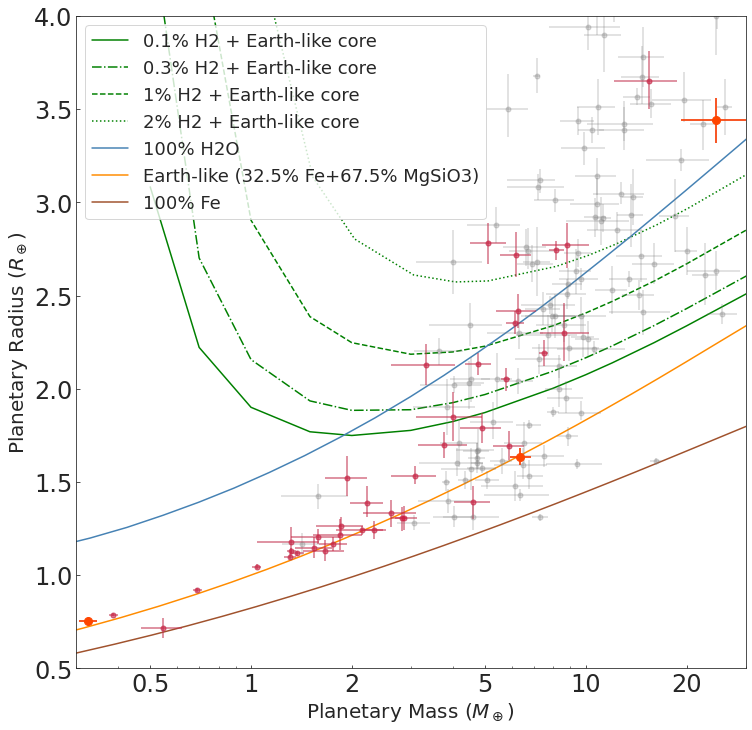

In [51]:
f,ax = pl.subplots(1,1,figsize=(12,12))
pl.xlim(0.3, 30)

for ls, lb, df in zip(lss, labels_h2, df_h2):
    pl.plot(df[0],df[1], label=r'{}% H2 + Earth-like core'.format(lb), color='green', ls=ls)
    
for col, lb, df in zip(col_ths, labels_th, df_th):
    pl.plot(df[0],df[1], label=r'{}'.format(lb), color=col, ls='solid')
    
pl.legend(fontsize=18)


pl.errorbar(df_all_s['pl_bmasse'], df_all_s['pl_rade'],xerr=[np.abs(df_all_s['pl_bmasseerr2']),df_all_s['pl_bmasseerr1']],\
            yerr=[np.abs(df_all_s['pl_radeerr2']),df_all_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.3, color='gray')
pl.errorbar(df_M_s['pl_bmasse'], df_M_s['pl_rade'],xerr=[np.abs(df_M_s['pl_bmasseerr2']),df_M_s['pl_bmasseerr1']],\
            yerr=[np.abs(df_M_s['pl_radeerr2']),df_M_s['pl_radeerr1']], fmt='o', ms=5,alpha=0.5, color='crimson')
#pl.plot(df_M['pl_bmasse'], df_M['pl_rade'],'+', ms=7, alpha=0.5, color='crimson')

for n in range(len(name_targets_s)):
    df = df_targets_s[n]

    pl.errorbar(df['pl_bmasse'], df['pl_rade'],xerr=[np.abs(df['pl_bmasseerr2']),df['pl_bmasseerr1']],\
                yerr=[np.abs(df['pl_radeerr2']),df['pl_radeerr1']],fmt='o', ms=8, alpha=1, color='orangered')
    #pl.plot(df['pl_bmasse'], df['pl_rade'],'o', ms=7, alpha=1, color='orangered')
    #ax.text(df['pl_bmasse'], df['pl_rade'],name_targets[n], color='gray', fontsize=15)

pl.ylim(0.5, 4)

pl.xlabel(r'Planetary Mass ($M_\oplus$)')
pl.ylabel(r'Planetary Radius ($R_\oplus$)')
pl.xscale('log')
pl.xticks([0.5, 1, 2, 5,10, 20], ["0.5","1", "2", "5", "10", "20"])

f.savefig('mass-radius.pdf', bbox_inches='tight')